# Final Project: Distinctive Features of Breast Cancer Cells in Predicting Whether the Cancer is Benign or Malignant
by 

*   *Allison Priore* <contact retracted>
*   *Kevin Guan* <contact retracted>
*   *Motahareh Larimi* <contact retracted>
*   *Landon Mulford* <contact retracted>


##*Breast Cancer Wisconsin (Diagnostic) Data Set* from the UC Irvine Machine Learning Repository 

> We found the data from this [Gooogle DataSetSearch](https://datasetsearch.research.google.com/search?query=Breast%20Cancer%20Wisconsin&docid=L2cvMTFqOWM3ejY5Yw%3D%3D)


1.   Dataset authored and provided by
UCI Machine Learning

2.   Dataset updated Sep 25, 2016




## 1. *Let's install our libraries and get up to speed with everything*

In [53]:
!python --version
!pip install pandas
!pip install numpy

Python 3.7.10


## 2. *Setting up Filestream*

In [54]:
import os
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)
os.chdir("/content/drive/My Drive/Final Project_Data/")

Mounted at /content/drive/


# *Importing the packages to work with*

In [55]:
import numpy as np

import seaborn as sns

import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.colors 
from mpl_toolkits.mplot3d import Axes3D

import scipy.stats
from scipy.stats import gaussian_kde

from sklearn import preprocessing 
from sklearn import decomposition
from sklearn import manifold

import statsmodels.stats.weightstats as sms
import statsmodels.formula.api as smf
import statsmodels.api as sm

#We have many packages! Enjoy! 

## 3. *Now let's see what data we are working with*

In [56]:
matplotlib.style.use('ggplot')
df=pd.read_csv('wdbc.data', names=['ID','Diagnosis','Radius','Texture','Peirmeter','Area','Smoothness',
                                   'Compactness','Concavity','Concave_point','Symmetry','Fractal_dimensions',
                                   'RadiusSE','TextureSE','PerimeterSE','AreaSE','SmoothnessSE',
                                   'CompactnessSE','ConcavitySE','Concave_pointSE','SymmetrySE','Fractal_dimensionsSE',
                                   'RadiusW','TextureW','PreimeterW','AreaW','SmoothnessW',
                                   'CompactnessW','ConcavityW','Concave_pointW','SymmetryW','Fractal_dimensionsW'],engine='c')
df.head()

print(df.dtypes)  #check out what types of data we are working with (int, floats, strings, objects, etc)

#This is optional
#df = df.drop(['ID'], axis = 1)
#df.drop(df.iloc[:,11:32], axis = 1)
#print(df.head()) 
#We do not need the ID column since it is meaningless to us right now.

ID                        int64
Diagnosis                object
Radius                  float64
Texture                 float64
Peirmeter               float64
Area                    float64
Smoothness              float64
Compactness             float64
Concavity               float64
Concave_point           float64
Symmetry                float64
Fractal_dimensions      float64
RadiusSE                float64
TextureSE               float64
PerimeterSE             float64
AreaSE                  float64
SmoothnessSE            float64
CompactnessSE           float64
ConcavitySE             float64
Concave_pointSE         float64
SymmetrySE              float64
Fractal_dimensionsSE    float64
RadiusW                 float64
TextureW                float64
PreimeterW              float64
AreaW                   float64
SmoothnessW             float64
CompactnessW            float64
ConcavityW              float64
Concave_pointW          float64
SymmetryW               float64
Fractal_

#There is an error in the header of the dataset! Let's fix it! 

In [57]:
df.rename(columns={'Peirmeter': 'Perimeter'}, inplace=True)

In [58]:
df.head()
df.describe()

,ID,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions,RadiusSE,TextureSE,PerimeterSE,AreaSE,SmoothnessSE,CompactnessSE,ConcavitySE,Concave_pointSE,SymmetrySE,Fractal_dimensionsSE,RadiusW,TextureW,PreimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,Concave_pointW,SymmetryW,Fractal_dimensionsW
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#Let's work with a dataset without any of the missing values. There is 2 ways to do this!

The first way is splicing

In [59]:
Sliced_df=df.iloc[:,1:12]
Sliced_df.head()

print (Sliced_df.isnull().sum())

Diagnosis             0
Radius                0
Texture               0
Perimeter             0
Area                  0
Smoothness            0
Compactness           0
Concavity             0
Concave_point         0
Symmetry              0
Fractal_dimensions    0
dtype: int64


The second way is to define a function

In [60]:
def missing_data(x):  #Defining a function to check for any misssing data 
  return sum(x.isnull())

print("The missing values per columns: ")
print("\n")
print(df.apply(missing_data, axis = 0)) #It looks like we do not have any missing data 

#Everything looks good. Time to print it out 
#df.head()

The missing values per columns: 


ID                      0
Diagnosis               0
Radius                  0
Texture                 0
Perimeter               0
Area                    0
Smoothness              0
Compactness             0
Concavity               0
Concave_point           0
Symmetry                0
Fractal_dimensions      0
RadiusSE                0
TextureSE               0
PerimeterSE             0
AreaSE                  0
SmoothnessSE            0
CompactnessSE           0
ConcavitySE             0
Concave_pointSE         0
SymmetrySE              0
Fractal_dimensionsSE    0
RadiusW                 0
TextureW                0
PreimeterW              0
AreaW                   0
SmoothnessW             0
CompactnessW            0
ConcavityW              0
Concave_pointW          0
SymmetryW               0
Fractal_dimensionsW     0
dtype: int64


#Before we can form a hypothesis, let's take a preliminary statistical look at the data now that we have the labels organized

#Let's see how many benign and malignant tumors we have

One way we can do it directly like this

B    357
M    212
Name: Diagnosis, dtype: int64


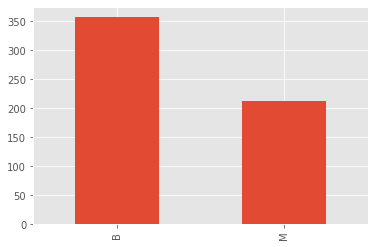

In [61]:
print(df['Diagnosis'].value_counts())
df['Diagnosis'].value_counts().plot(kind = "bar")
#357 benign tumors
#212 malignant cancers 


Or we can make a for loop to count it for us! 

In [62]:
#Let's check those numbers another way, with a 'for' loop:
X = 0 #(variable for malignant diagnosis)
Y = 0 #(variable for benign diagnosis)
for i in (df['Diagnosis']):
  if i == 'M':
    X += 1
  if i == 'B':
    Y += 1
print('The number of malignant biopsy findings is', X, 'and the number of benign biopsy findings is', Y)

The number of malignant biopsy findings is 212 and the number of benign biopsy findings is 357


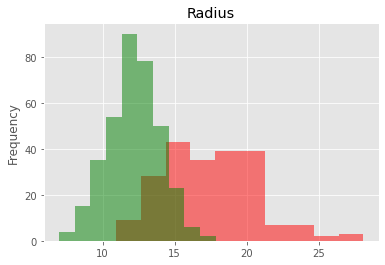

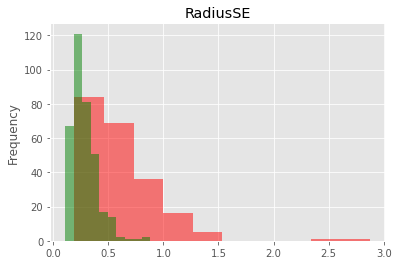

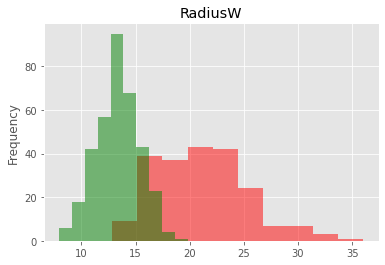

In [63]:
for var in ('Radius', 'RadiusSE', 'RadiusW'):
  plt.figure()
  df[var][df['Diagnosis'] == 'M'].plot.hist(alpha = 0.50, color = "red", title = var)
  df[var][df['Diagnosis'] == 'B'].plot.hist(alpha = 0.50, color = "green", title = var)
#Here we are making side by side comparisons between the datasets containing the radius of each of the malignant and benign tumors. 
#The green is the benign or harmless tumors. 
#The red is the malignant or harmful tumors. 

#Let's see how each data relate to each other and which ones we should make into the independent variable in our hypothesis testing!

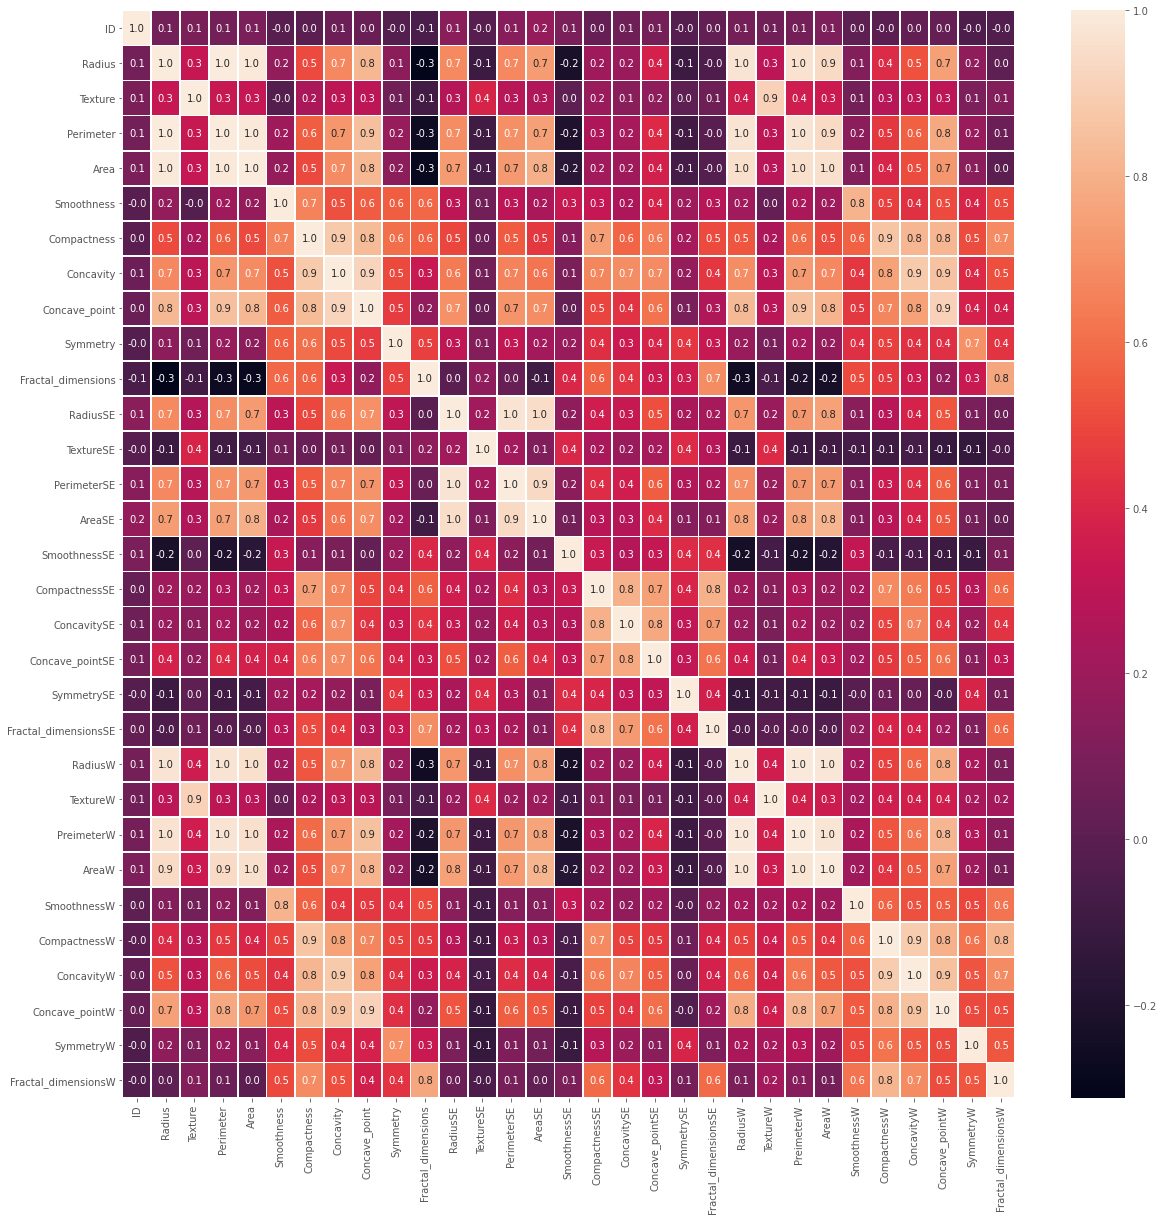

In [64]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.75, fmt= '.1f',ax=ax)

## 4. Now let's form our hypothesis now that we had a look at the data!

#Hypothesis: Will the features of the cell nuclei cluster into distinct groups with similar characteristics that reflect the benign/malignant diagnosis, and/or split within diagnosis?

Let's use the matplotlib's 3D scatter plot feature, that we imported, to test this.

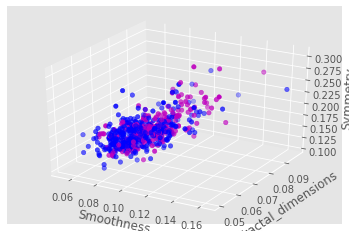

In [65]:
#what it looks like to plot the original dataframe, with no standardization. 
#Hue differentiates between malignant and benign diagnosis. Hard to tell, but it looks like the purple generally aligns in some places.
Sliced_df_plot = plt.figure().gca(projection = '3d')
Sliced_df_plot.scatter(Sliced_df['Smoothness'], Sliced_df['Fractal_dimensions'], Sliced_df['Symmetry'], c = Sliced_df['Diagnosis'])
Sliced_df_plot.set_xlabel('Smoothness')
Sliced_df_plot.set_ylabel('Fractal_dimensions')
Sliced_df_plot.set_zlabel('Symmetry')
plt.show()

###Meh - this isn't super informative. So let's do more data analysis. 
Step 1: change diagnosis to 0 and 1 before continuing.

In [66]:
Sliced_df['Diagnosis'].replace(['M', 'B'],[1,0],inplace=True)
Sliced_df.head()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [67]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms_array = mms.fit_transform(Sliced_df)
print(mms_array)

[[1.         0.52103744 0.0226581  ... 0.73111332 0.68636364 0.60551811]
 [1.         0.64314449 0.27257355 ... 0.34875746 0.37979798 0.14132266]
 [1.         0.60149557 0.3902604  ... 0.63568588 0.50959596 0.21124684]
 ...
 [1.         0.45525108 0.62123774 ... 0.26351889 0.26767677 0.13732098]
 [1.         0.64456434 0.66351031 ... 0.7554672  0.67525253 0.42544229]
 [0.         0.03686876 0.50152181 ... 0.         0.26616162 0.18702612]]


#Now converting the scaled data array back to a dataframe:

In [68]:
df_mms = pd.DataFrame(mms_array)
df_mms.columns=["Diagnosis",	"Radius",	"Texture",	"Perimeter",	"Area",	"Smoothness",	"Compactness",	"Concavity",	"Concave_point",	"Symmetry",	"Fractal_dimensions"]
df_mms.head()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816


#Now to see what it looks like with scaled data.

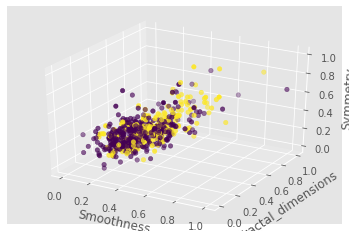

In [69]:
df_mms_plot = plt.figure().gca(projection = '3d')
df_mms_plot.scatter(df_mms['Smoothness'], df_mms['Fractal_dimensions'], df_mms['Symmetry'], c = df_mms['Diagnosis'])
df_mms_plot.set_xlabel('Smoothness')
df_mms_plot.set_ylabel('Fractal_dimensions')
df_mms_plot.set_zlabel('Symmetry')
plt.show()
#better, but not much of an improvement.

#Perhaps the data points, that we chose, are not the best ones to use. Let's try some others.

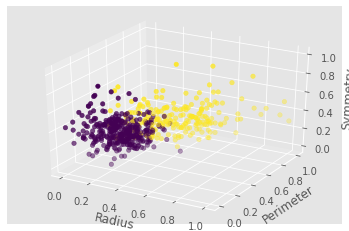

In [70]:
df_mms_plot = plt.figure().gca(projection = '3d')
df_mms_plot.scatter(df_mms['Radius'], df_mms['Perimeter'], df_mms['Symmetry'], c = df_mms['Diagnosis'])
df_mms_plot.set_xlabel('Radius')
df_mms_plot.set_ylabel('Perimeter')
df_mms_plot.set_zlabel('Symmetry')
plt.show()
#oh, wow! now that separates out nicely. It is clear that these features are highly correllated to diagnosis,
#as published.

# Now let's test to see if the tumor is more compact, then there will be a higher likelihood of it being maligant

## Here we can split the data in half in respect to their compactness, with one half being the high compactness and the other one being low

In [71]:
Sliced_df['Compactness'].median()
LowCompactness_df = Sliced_df[Sliced_df['Compactness'] <= 0.09262999999999999]
HighCompactness_df= Sliced_df[Sliced_df['Compactness'] > 0.09262999999999999]
LowCompactness_df.head()
HighCompactness_df.head()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions
0,1,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871
2,1,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883
5,1,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613


# We can hot embed encode this data. We did it before. Let's do it again. 

# Malignant diagnosises with a 1 and the benign ones with a 0 on the low compactness data.


In [72]:
LowCompactness2_df=LowCompactness_df.replace(to_replace = "M", 
                 value =1)
Final_Low_Compactness_df=LowCompactness2_df.replace(to_replace = "B", 
                 value =0)

Final_Low_Compactness_df.head()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
10,1,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697
16,1,14.680,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905


In [73]:
HighCompactness2_df=HighCompactness_df.replace(to_replace = "M", 
                 value =1)
Final_High_Compactness_df=HighCompactness2_df.replace(to_replace = "B", 
                 value =0)

Final_High_Compactness_df.head()

,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions
0,1,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871
2,1,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,0.1809,0.05883
5,1,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,0.2087,0.07613


#Here let's see the difference in the mean compactness between malignant and benign tumors in a bar graph


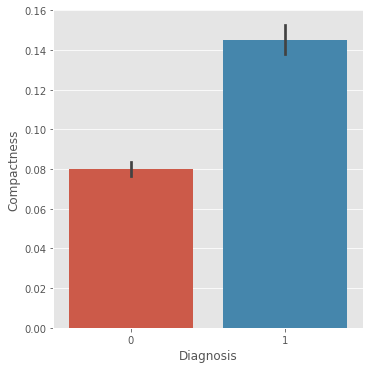

In [51]:
sns.catplot(x="Diagnosis", y="Compactness",  kind="bar", data=Sliced_df);

# 5. **Conclusion**: `We can say that there is a statistically signifigant correlation between the compactness of a tumor and the likelihood of it being malignant. `
# From this data you can see that the z score is high enough and the p score is low enough to reject the null hypothesis 


In [52]:
z,p = sms.ztest(Final_High_Compactness_df['Diagnosis'],Final_Low_Compactness_df['Diagnosis'])
print(z,p)

15.542757372548463 1.781504190209145e-54
